In [1]:
#Important modules
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
import customfunc
import matrix

## Abricate
Run [abricate](https://github.com/tseemann/abricate) to search for antibiotic resistance genes, plasmid genes and virulence factors in several databases

In [2]:
#!abricate ~/documentos/github/ARG-Sentinel/genomes_hc/*.fasta --db plasmidfinder --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/plasmidfinder_hc.csv

In [3]:
#!abricate ~/documentos/github/ARG-Sentinel/genomes_hc/*.fasta --db argannot --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/argannot_hc.csv

In [4]:
#!abricate /home/tiago/documentos/github/ARG-Sentinel/genomes_hc/*.fasta --db card --noheader > /home/tiago/documentos/github/ARG-Sentinel/spreadsheets/card_hc.csv

## Load dataframes

In [7]:
card = pd.read_csv("/home/tiago/documents/github/ARG-Sentinel/spreadsheets/card_hc.csv",sep = '\t', names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
card['file'] = card['file'].apply(lambda x: x.split('/')[-1])
card['species'] = None
card["record"] = None

#Add column species
species = pd.read_csv('~/documents/github/ARG-Sentinel/spreadsheets/info.csv')
species['assembly'] = species['assembly'].apply(lambda x: x + '.fasta')
card.set_index('file', inplace = True)
for i in species.itertuples():
    if i.assembly in card.index:
        card.loc[i.assembly,['species']] = i.specie
        card.loc[i.assembly,['record']] = i.registro
card.reset_index(inplace = True)
card.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,identity_perc,database,accession,product,resistance,species,record
0,genome1.fasta,NODE_10_length_160826_cov_5.747043,58092,59246,-,Klebsiella_pneumoniae_OmpK37,1-1125/1125,========/======,7/32,99.91,95.24,card,AJ011502.1:300-1425,Klebsiella pneumoniae outer membrane porin pro...,carbapenem;cephalosporin;cephamycin;monobactam...,K. pneumoniae,98M3
1,genome1.fasta,NODE_11_length_157632_cov_5.996896,7161,8021,-,SHV-182,1-861/861,===============,0/0,100.00,99.88,card,KP050489:0-861,From the Lahey list of beta-lactamases.,carbapenem;cephalosporin;penam,K. pneumoniae,98M3
2,genome1.fasta,NODE_11_length_157632_cov_5.996896,28130,28498,-,marA,1-369/384,===============,0/0,96.09,81.57,card,AP009048.1:1621287-1621671,In the presence of antibiotic stress E. coli o...,carbapenem;cephalosporin;cephamycin;fluoroquin...,K. pneumoniae,98M3
3,genome1.fasta,NODE_19_length_101067_cov_6.844693,27472,29220,+,msbA,1-1749/1749,===============,0/0,100.00,80.62,card,U00096.3:966620-968369,MsbA is a multidrug resistance transporter hom...,nitroimidazole,K. pneumoniae,98M3
4,genome1.fasta,NODE_21_length_99473_cov_9.392658,42202,43568,+,cpxA,1-1367/1374,===============,0/0,99.49,82.08,card,BA000007.3:4905062-4903688,CpxA is a membrane-localized sensor kinase tha...,aminocoumarin;aminoglycoside,K. pneumoniae,98M3


In [8]:
#Argannot
argannot = pd.read_csv("~/documents/github/ARG-Sentinel/spreadsheets/argannot_hc.csv",sep = '\t', names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
argannot['file'] = argannot['file'].apply(lambda x: x.split('/')[-1])
argannot['species'] = None
argannot["record"] = None

#Add column species
species = pd.read_csv('~/documents/github/ARG-Sentinel/spreadsheets/info.csv')
species['assembly'] = species['assembly'].apply(lambda x: x + '.fasta')
argannot.set_index('file', inplace = True)
for i in species.itertuples():
    if i.assembly in argannot.index:
        argannot.loc[i.assembly,['species']] = i.specie
        argannot.loc[i.assembly,['record']] = i.registro
argannot.reset_index(inplace = True)
argannot.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,identity_perc,database,accession,product,resistance,species,record
0,genome1.fasta,NODE_11_length_157632_cov_5.996896,7161,8021,-,(Bla)blaSHV-11,1-861/861,===============,0/0,100.0,100.00,argannot,HM751098:1-861,(Bla)blaSHV-11,NaN,K. pneumoniae,98M3
1,genome1.fasta,NODE_25_length_91321_cov_14.844018,88440,89255,+,(Sul)sul2,1-816/816,===============,0/0,100.0,100.00,argannot,EU360945:1617-2432,(Sul)sul2,NaN,K. pneumoniae,98M3
2,genome1.fasta,NODE_25_length_91321_cov_14.844018,89316,90119,+,(AGly)strA,1-804/804,===============,0/0,100.0,99.88,argannot,AB366441:22458-23261,(AGly)strA,NaN,K. pneumoniae,98M3
3,genome1.fasta,NODE_25_length_91321_cov_14.844018,90119,90955,+,(AGly)strB,1-837/837,===============,0/0,100.0,100.00,argannot,FJ474091:264-1100,(AGly)strB,NaN,K. pneumoniae,98M3
4,genome1.fasta,NODE_32_length_73386_cov_7.467614,13922,15097,+,(Flq)OqxA,1-1176/1176,===============,0/0,100.0,100.00,argannot,EU370913:46652-47827,(Flq)OqxA,NaN,K. pneumoniae,98M3


In [9]:
plasmidfinder = pd.read_csv("~/documents/github/ARG-Sentinel/spreadsheets/plasmidfinder_hc.csv",sep = "\t",names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
plasmidfinder['file'] = plasmidfinder['file'].apply(lambda x: x.split('/')[-1])
plasmidfinder['species'] = None
plasmidfinder['record'] = None
#Add column species
species = pd.read_csv('~/documents/github/ARG-Sentinel/spreadsheets/info.csv')
species['assembly'] = species['assembly'].apply(lambda x: x + '.fasta')
plasmidfinder.set_index('file', inplace = True)
for i in species.itertuples():
    if i.assembly in plasmidfinder.index:
        plasmidfinder.loc[i.assembly,['species']] = i.specie
        plasmidfinder.loc[i.assembly,['record']] = i.registro
plasmidfinder.reset_index(inplace = True)
plasmidfinder.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,identity_perc,database,accession,product,resistance,species,record
0,genome1.fasta,NODE_27_length_87380_cov_12.014012,44388,44626,-,IncFII_1_pKP91,1-230/230,========/======,4/9,100.0,87.03,plasmidfinder,CP000966,IncFII_1_pKP91_CP000966,NaN,K. pneumoniae,98M3
1,genome1.fasta,NODE_39_length_51018_cov_14.408885,21125,21541,+,IncA/C2_1,1-417/417,===============,0/0,100.0,100.00,plasmidfinder,JN157804,IncA/C2_1__JN157804,NaN,K. pneumoniae,98M3
2,genome1.fasta,NODE_42_length_42978_cov_16.990438,10037,10410,-,IncX3_1,1-374/374,===============,0/0,100.0,99.73,plasmidfinder,JN247852,IncX3_1__JN247852,NaN,K. pneumoniae,98M3
3,genome1.fasta,NODE_62_length_9393_cov_64.187218,4306,4435,-,ColRNAI_1,1-130/130,===============,0/0,100.0,100.00,plasmidfinder,DQ298019,ColRNAI_1__DQ298019,NaN,K. pneumoniae,98M3
4,genome1.fasta,NODE_67_length_6761_cov_15.677875,2698,3257,+,IncFIB(K)_1_Kpn3,1-560/560,===============,0/0,100.0,100.00,plasmidfinder,JN233704,IncFIB(K)_1_Kpn3_JN233704,NaN,K. pneumoniae,98M3


## HC Resistome profile

In [10]:
argannot['class'] = argannot['gene'].apply(lambda x: x.split(')')[0]).apply(lambda y: y.split('(')[1]) #Creating the "class" column
argannot['species'] = argannot["species"] + " " + argannot["record"]
profile = argannot[['species','class']].set_index('species') # take important columns
profile = pd.get_dummies(profile).groupby(level = 0).sum()
profile.head()

,class_AGly,class_Bla,class_Fcyn,class_Flq,class_MLS,class_Phe,class_Sul,class_Tet,class_Tmt
species,,,,,,,,,
A. pittii 112M3,0,5,0,0,0,0,0,0,0
A. pittii 466A,1,4,0,0,0,0,0,0,0
E. coli 92M3,0,5,0,0,0,0,1,1,0
E. asburiae 790C,1,2,1,2,0,0,0,0,0
E. coli 126M3,2,6,0,0,0,1,1,3,1


Text(86.99999999999999, 0.5, '')

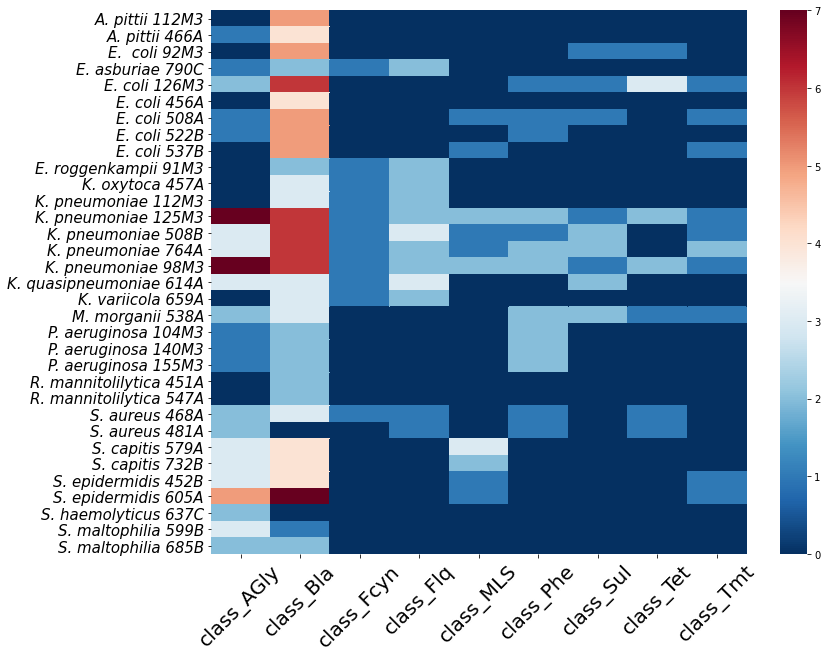

In [12]:
plt.figure(figsize = (12,10))
sns.heatmap(profile, cmap = "RdBu_r")
plt.colormaps()
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 15, fontstyle = 'italic')
plt.ylabel('')
#plt.savefig('heatmapmap_classes_argannot.png', bbox_inches = 'tight',dpi = 600)

In [13]:
card["species"] = card["species"] + " " + card["record"]

In [26]:
argannotANDcard = card.set_index(["species","file"]).loc[set(argannot.species)]
argannotANDcard.to_csv("/home/tiago/documents/github/ARG-Sentinel/spreadsheets/argannotANDcard.csv")

# Responder as questões do revisor do relatório

<p style='text-align: justify;'>
Sugiro alguns pontos a serem pensados:<br />
<b>#1</b> Analisar separadamente Gram-negativos e Gram-positivos. Marcadores de resistência para os dois grupos são
muito diferentes e não podem ser agrupados. Não existe, por definição, ESBL em Gram-positivos. Por isso o achado de um isolado de Staphylococcus deve ser revisado. <br />
<b>Resposta:</b> Em nenhum momento foi citado no relátio a presença de ESBL em <i>Staphyloccoccus aures </i> !
</p>

<center> ---------- \\ ---------- </center>
<p style='text-align: justify;'>
<b>#2</b> Consultar documentos do CLSI (M100) e EUCAST (Expert rules and intrinsic resistance) para verificar quais
espécies tem resistências intrínsecas que não tem importância epidemiológica. <br />
<b>Resposta:</b> Seria interessante analisas as espéscies sem importância epidemiológica, pois os ARGs "usar" comunidades ambientais como reservatório.
</p> 

<center> ---------- \\ ---------- </center>

<p style='text-align: justify;'>
<b>#3</b> Confirmar a ausência de determinantes cromossomais: por exemplo o AmpC "deletado" na amostra de E. coli
45. AmpC tem papel fundamental na biologia bacteriana, especificamente na reciclagem dos peptideoglicanos para construção da parede e posterior divisão celular. Seria surpreendente (para não dizer impossível) uma bactéria não ter porque ela não iria sobreviver. Certamente (e esse resultado é mostrado no relatório) a cepa 45 tem um ortólogo. Portanto, detectar ampC em E. coli não tem significado. Por outro lado, detectar ampC plasmidial sim tem significado, porque reflete a aquisição de um determinante de resistência.
</p>

<center> ---------- \\ ---------- </center>

<p style='text-align: justify;'>
<b>#4</b> O fato de detectar a PBP de E. coli em Klebsiella não apresenta relevância (pelo menos com as informações
apresentadas no relatório). PBP são proteinas transpeptidases que fazem também a síntese de parede. O fato de ter encontrado a da E. coli na Klebsiella não é surpreendente. Provavelmente a primeira a ser depositada (e comum a todas as enterobactérias, ou parte do táxon) foi de E. coli por ser o organismo protótipo para estudos em bacteriologia. No entanto, o cenário muda totalmente quando fala-se em PBP alteradas, como é o caso da PBP2a de Staphylococcus que confere resistência (adquirida) à meticilina. Aí é relevante pesquisar o gene que codifica a PBP2a <b>(que no caso é o mecA), mas somente em Staphylococcus. spp </b><br />
</p>

<b>Resposta:</b> Encontramos o gene <b>(Bla)mecA</b> em <i>Staphylococcus</i>

In [ ]:
argannot.set_index('gene').loc['(Bla)mecA',]

<center> ---------- \\ ---------- </center>

<p style='text-align: justify;'>
<b>#5</b> O fato de encontrar genes de resistência adquiridos em diferentes isolados não tem relação direta com a
aquisição prévia e posterior disseminação clonal. Muitas vezes a aquisição pode acontecer em diferentes momentos (veja por exemplo o caso de KPC e dos grupos clonais predominantes), por meio de plasmídeos conjugativos. Para termos alguma evidência mais assertiva sobre o que ocorreu primeiro, a aquisição do gene ou a dispersão bacteriana é necessário estudar o contexto genético dos genes de resistência, se possível os inc types dos plasmídeos, pois eles fornecem essas informações sobre tipagem de plamsídeo. Sem essas informações é difícil afirmar se a aquisição foi única ou múltipla ao longo do tempo.<br />
</p>

<b>5.1.</b> Encontrar os Nodes que contêm genes de plasmídeos e de resistência a antibióticos: cruzar ARG-Annot e Plasmidfinder

In [ ]:
CArgs = set(argannot['sequence'].values) #Conjunto dos Nodes com ARGs
CPlasmid = set(plasmidfinder['sequence'].values) #Conjunto dos Node com genes de plasmídeo
argsEplamid = CArgs & CPlasmid #Intersecção de ambos 
print(f"ARG-Annot: {len(CArgs)}\nPlasmifinder: {len(CPlasmid)}\nIntersecção: {len(argsEplamid)}")

In [ ]:
argannot.set_index('sequence').loc[list(argsEplamid),:]

<b>5.2 BLASTn</b> 

<p>Códigio para estrair os nodes para blast</p>
<code>
for a in argannot.set_index('sequence').loc[list(argsEplamid),:].itertuples():
    for r in SeqIO.parse(f'{caminho}/{a.file}','fasta'):
        if r.id == a.Index:
            file = open(f'{a.Index}.fasta','a')
            file.write(f'>{r.id}\n')
            file.write(f'{r.seq}')
            file.close()
</code>

In [ ]:
plasmids = pd.DataFrame({'Node':['NODE_60_length_703_cov_4241.998344',
                                 'NODE_45_length_533_cov_0.048387',
                                 'NODE_71_length_640_cov_0.247689',
                                 'NODE_62_length_747_cov_0.206790',
                                 'NODE_45_length_533_cov_0.048387',
                                 'NODE_56_length_2305_cov_620.290118',
                                 'NODE_15_length_136795_cov_22.099162',
                                 'NODE_42_length_42978_cov_16.990438',
                                 'NODE_18_length_24824_cov_61.573873',
                                 'NODE_22_length_73939_cov_13.042389',
                                 'NODE_34_length_63067_cov_25.930044',
                                 'NODE_37_length_43294_cov_12.460632',
                                 'NODE_38_length_1699_cov_0.250000',
                                 'NODE_27_length_10506_cov_41.427597',
                                 'NODE_41_length_4753_cov_20.978728',
                                 'NODE_43_length_2345_cov_2403.472395',
                                 'NODE_44_length_43061_cov_24.463410',
                                 'NODE_71_length_1939_cov_0.339130',
                                 'NODE_2_length_217598_cov_19.485952'],
                         'Blast':['Staphylococcus hominis strain Sho-115Lar plasmid pSho-115Lar, complete sequence Z',
                                  'Staphylococcus aureus strain UP_1484 plasmid unnamed, complete sequence',
                                  'Staphylococcus aureus subsp. aureus strain SR168 plasmid pSR168, complete sequence',
                                  'Staphylococcus hominis strain Sho-115Lar plasmid pSho-115Lar, complete sequence',
                                  'Staphylococcus aureus strain UP_1484 plasmid unnamed, complete sequence',
                                  'Staphylococcus aureus subsp. aureus strain SR241 plasmid pSR241, complete sequence',
                                  'Photobacterium damselae subsp. piscicida plasmid pP91278 DNA, complete sequence',
                                  'Klebsiella pneumoniae strain 1194/11 plasmid pKP1194a, complete sequence',
                                  'Staphylococcus caprae strain 26D plasmid unnamed1, complete sequence-Cover:65%',
                                  'Escherichia coli strain ATCC 43886 plasmid unnamed1, complete sequence',
                                  'Klebsiella pneumoniae strain KP58 plasmid pKP58-3, complete sequence',
                                  'Salmonella enterica subsp. enterica serovar Newport str. CVM 22462 plasmid pCVM22462, complete sequence',
                                  'Staphylococcus aureus strain SA7112 plasmid pSA7112-1, complete sequence',
                                  'Staphylococcus capitis CR01 plasmid CR01, complete sequence',
                                  'Staphylococcus epidermidis strain 107.2 plasmid pAQZ1, complete sequence',
                                  'Staphylococcus epidermidis plasmid pNE131, complete sequence',
                                  'Klebsiella pneumoniae strain A64477 plasmid pKP64477d, complete sequence',
                                  'Staphylococcus haemolyticus strain 83131B plasmid p83131B, complete sequence',
                                  'ERROR'],
                         'link':[r'https://www.ncbi.nlm.nih.gov/nucleotide/MH423313.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PUSN2Z3016',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/CP047816.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PW724V9016',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/MN251857.1?report=genbank&log$=nucltop&blast_rank=5&RID=8PWWMJNU014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/MH423313.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PXBKW56014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/CP047816.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PXJF2T1014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/MN251858.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PY0PC96016',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/AB277724.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PY4WJED014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/KX756453.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PYUTMU5014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/CP031272.1?report=genbank&log$=nucltop&blast_rank=2&RID=8PZ6TFG501R',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/CP024254.1?report=genbank&log$=nucltop&blast_rank=1&RID=8PZGBZU7014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/CP041376.1?report=genbank&log$=nucltop&blast_rank=2&RID=8PZPN8NV016',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/CP009566.1?report=genbank&log$=nucltop&blast_rank=1&RID=8R02BXYE014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/KX011076.1?report=genbank&log$=nucltop&blast_rank=1&RID=8R0BB1YV014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/LN866850.1?report=genbank&log$=nucltop&blast_rank=1&RID=8R14ACME016',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/MK046687.1?report=genbank&log$=nucltop&blast_rank=1&RID=8R17AN87014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/M12730.1?report=genbank&log$=nucltop&blast_rank=1&RID=8R1BXRAG014',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/MF150120.1?report=genbank&log$=nucltop&blast_rank=1&RID=8R1GH7W5016',
                                 r'https://www.ncbi.nlm.nih.gov/nucleotide/CP025398.1?report=genbank&log$=nucltop&blast_rank=2&RID=8R2AM2S1014',
                                 'ERROR']
                })

In [ ]:
argannot_plasmids = [argannot.set_index('sequence').loc[plasmids['Node']],plasmidfinder.set_index('sequence').loc[plasmids['Node']]] #Resultados da busca
argannot_plasmids = pd.concat(argannot_plasmids, sort = True, axis = 0)
argannot_plasmids.reset_index(inplace = True)
argannot_plasmids.set_index(['file','sequence'],drop = False,inplace = True)
argannot_plasmids.sort_index(inplace = True)

In [ ]:
argannot_plasmids[argannot_plasmids['database'] == 'argannot'].drop(['sequence','resistance'], axis = 1)

In [ ]:
argannot_plasmids.loc[["genome1.fasta", "genome3.fasta", "genome22.fasta", "genome29.fasta", "genome30.fasta",
                 "genome32.fasta","genome33.fasta", "genome36.fasta", "genome41.fasta", "genome42.fasta"],['species']].to_csv('~/documentos/github/ARG-Sentinel/spreadsheets/argannot_plasmids.csv')




<p>
<b>5.3. Resultados parciais da busca por plasmídeos</b> <br />
Foram encontrados 18 nodes candidatos, dos quais 17 apresentaram resultado positivo para algum plasmídeo. <br />
Espécies que contem os nodes/plasmídeos<br />
<ul>
    <li>Enterobacter asburiae</li>
    <li>Escherichia coli</li>
    <li>Klebsiella pneumoniae</li>
    <li>Staphyloccoccus epidermidis</li>
    <li>Staphyloccoccus aureus</li>
    <li>Staphyloccoccus haemolyticus</li>
    <li>Staphyloccoccus warneri</li>
    <li>Stenotrophomonas maltophilia</li>
</ul>
</p>

<p>
    <b>5.4. Detalhamento dos plasmídeos encontrados</b><br />
    <b>Pedidos do Rafa:</b> <br /> 
<ul>
    <li>BLAST plasmídeos com L > 2kb </li>
    <li>Descobrir onde e quando foram encontrados</li>
    <li>Organismo de origem</li>
    <li>Prokka - descrever os plasmídeos</li>
    <li>Fazer figura/tabela com resumindo os dados</li>
</ul>
</p>    

<b>5.4.1 Extrair os Nodes com L > 2kb</b>

<code>
used = []
for i in argannot_plasmids.itertuples():
    for record in SeqIO.parse(f'{caminho}/{i.file}','fasta'):
        if record.id == i.sequence and int(i.sequence.split('_')[3])>=2000:
            if i.sequence not in used:
                fasta = open(f'{i.file}_plasmids.fasta','a')
                ident = record.id.split('_')[0]+record.id.split('_')[1]
                fasta.write(f'>{ident}\n')
                fasta.write(f'{record.seq}\n')
                fasta.close()
                used.append(i.sequence)
<code>

<code>
used = []
file = open('argannot_plasmids.fasta','a')
for i in argannot_plasmids.itertuples():
    for record in SeqIO.parse(f'{caminho}/{i.file}','fasta'):
        if record.id == i.sequence and int(i.sequence.split('_')[3])>=2000:
            if i.sequence not in used and i.sequence != 'NODE_2_length_217598_cov_19.485952' and i.sequence != "NODE_15_length_136795_cov_22.099162":
                file.write(f'>{record.id}\n')
                file.write(f'{record.seq}\n')
                used.append(i.sequence)
file.close()
<code>

In [ ]:
def df_plasmid (file):
    "cria um dataframe a partida de um arquivo gff"
    node = []
    start = []
    end = []
    strand = []
    prod = []
    prod_final = []
    gff = open(f'{file}','r')
    for i,l in enumerate(gff):
        if l.startswith('#') or l.startswith('>'):
            pass
        if l.startswith('NODE'):
            node.append(l.split('\t')[0])
            start.append(int(l.split('\t')[3]))
            end.append(int(l.split('\t')[4]))
            strand.append(l.split('\t')[6])
            prod.append(l.split('\t')[8])
            
    for items in prod:
        for items_sep in items.split(';'):
            if 'product=' in items_sep:
                prod_final.append(items_sep.split('=')[1].split('\n')[0])
    df = pd.DataFrame({'node':node,'start':start, 'end':end, 'strand':strand,'product':prod_final})
    df['length'] = df['end'] - df['start']
    return df    

<p style='text-align: justify;'>
<b> 5.4.2 Similaridade entre plasmídeos </b> <br />
 Os plasmídeos parecem não conter grandes sequências em comum pois nenhum método de alinhamento funcionou. Será que alinhar as cds sozinhas vai funcionar?
</p>

In [ ]:
genome1 = df_plasmid('genome1_plasmids.gff')
genome1 = genome1.query('product != "hypothetical protein"')

genome3 = df_plasmid('genome3_plasmids.gff')
genome3 = genome3.query('product != "hypothetical protein"')

genome22 = df_plasmid('genome22_plasmids.gff')
genome22 = genome22.query('product != "hypothetical protein"')

genome29 = df_plasmid('genome29_plasmids.gff')
genome29 = genome29.query('product != "hypothetical protein"')

genome30 = df_plasmid('genome30_plasmids.gff')
genome30 = genome30.query('product != "hypothetical protein"')

genome32 = df_plasmid('genome32_plasmids.gff')
genome32 = genome32.query('product != "hypothetical protein"')

genome33 = df_plasmid('genome33_plasmids.gff')
genome33 = genome33.query('product != "hypothetical protein"')

genome36 = df_plasmid('genome36_plasmids.gff')
genome36 = genome36.query('product != "hypothetical protein"')

genome41 = df_plasmid('genome41_plasmids.gff')
genome41 = genome41.query('product != "hypothetical protein"')

genome42 = df_plasmid('genome42_plasmids.gff')
genome42 = genome42.query('product != "hypothetical protein"')

genomes_selec = [genome1, genome3, genome22, genome29, genome30,
                 genome32,genome33, genome36, genome41, 
                 genome42]


In [ ]:
tag = 'product'
df_set_genomes = pd.DataFrame(columns = ["0","1","2","3","4","5","6","7","8","9"], 
                              index = ["0","1","2","3","4","5","6","7","8","9"])
for ia,a in enumerate(genomes_selec):
    for ib,b in enumerate(genomes_selec):
        if ia != ib:
            conj = set(list(a[tag])) & set(list(b[tag]))
            
            
            df_set_genomes.loc[str(ia),str(ib)] = len(conj)
        if ia != ib and len(conj) > 0:
            print(f'Existem {len(conj)} genes em comum nos DFs {ia}x{ib}: {conj}')
            print('='*100)
            
df_set_genomes.columns = ['K. pneumoniae g1',
                          'E. coli g3', 
                          'S. warneri g22',
                          'S epidermidis g29',
                          'S. warneri g30',
                          'S. epidermidis g32', 
                          'S. aureus g33',
                          'K. pneumoniae g36',
                          'K. pneumoniae g41',
                          'E. coli g42']
df_set_genomes.index = ['K. pneumoniae g1',
                          'E. coli g3', 
                          'S. warneri g22',
                          'S epidermidis g29',
                          'S. warneri g30',
                          'S. epidermidis g32', 
                          'S. aureus g33',
                          'K. pneumoniae g36',
                          'K. pneumoniae g41',
                          'E. coli g42']


df_set_genomes

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df_set_genomes.fillna(0),cmap = "RdBu_r")
plt.title('Shared genes in plasmids')
plt.xticks(fontstyle = 'italic')
plt.yticks(fontstyle = 'italic')
plt.savefig('heatmap_plasmids.pdf',bbox_inches = 'tight')

In [ ]:
pl_blasted_treated = pd.read_csv('plasmids_blasted_treated.csv')

In [ ]:
pl_blasted_treated.head()

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(131)
plt.title('Identity distribution', fontsize = 10)
sns.boxplot(pl_blasted_treated[' % identity'].div(1000), orient = 'v', color = 'red')
sns.swarmplot(pl_blasted_treated[' % identity'].div(1000), color = 'black', orient = 'v')
median = pl_blasted_treated[' % identity'].div(1000).median()
plt.xlabel(f'Median value: {median}')

plt.subplot(132)
plt.title('Alignment length distribution', fontsize = 10)
sns.boxplot(pl_blasted_treated[' alignment length'], orient = 'v', color = 'green')
sns.swarmplot(pl_blasted_treated[' alignment length'], orient = 'v', color = 'black')
median = pl_blasted_treated[' alignment length'].median()
plt.xlabel(f'Median value: {median}')

plt.subplot(133)
plt.title('evalue distribution', fontsize = 10)
sns.boxplot(pl_blasted_treated[' evalue'], orient = 'v',color = 'blue')

plt.tight_layout()

In [ ]:
plt.figure(figsize = (10,15))

plt.tight_layout()
plt.subplot(421)
sns.distplot(pl_blasted_treated[' % identity'].div(1000), bins = len(pl_blasted_treated[' % identity']))
median = pl_blasted_treated[' % identity'].div(1000).median()
plt.axvline(median, color = 'black', linestyle = '--')

plt.subplot(422)
sns.distplot(pl_blasted_treated[' alignment length'])
median = pl_blasted_treated[' alignment length'].median()
plt.axvline(median, color = 'black', linestyle = '--')

plt.subplot(423)
sns.distplot(pl_blasted_treated[' evalue'])
median = pl_blasted_treated[' evalue'].median()
plt.axvline(median, color = 'black', linestyle = '--')

plt.savefig('distplot_blasts.pdf', bbox_inches = 'tight')